In [3]:
import sys
sys.path.insert(0,"../")
import Constants.SI as SI
import eBeam
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Beam parameters (from Tarkeshian et. al 2018)
beta = 0.99999
sigma_r = 5.67e-6;
sigma_t = 21e-15;
sigma_z = beta * sigma_t * SI.lightSpeed;
Q = 230e-12;
N = Q/SI.elemCharge
beamParams = [sigma_z, sigma_r, .99999, Q]
pPK = eBeam.peak_charge_dens(beamParams)


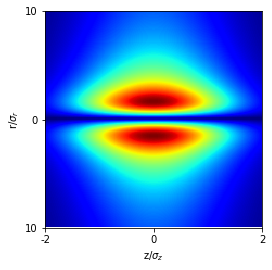

In [27]:
# r and z arrays for computing the E field
r = np.linspace(-10*sigma_r, 10*sigma_r, 200)
z = np.linspace(-2 * sigma_z, 2*sigma_z, 200)
npoints = 200;
pos = [r, z]
Er, rPeak, EPeak = eBeam.rad_E_field(pos, beamParams)
plt.imshow(abs(Er), cmap = 'jet')
xticks = [0, npoints/2, npoints]
plt.xticks(xticks, [-2, 0, 2])
plt.yticks(xticks, [10, 0, 10])
cbar = plt.colorbar(cax = ax)
plt.xlabel('z/$\sigma_z$');
plt.ylabel('r/$\sigma_r$');

<IPython.core.display.Javascript object>


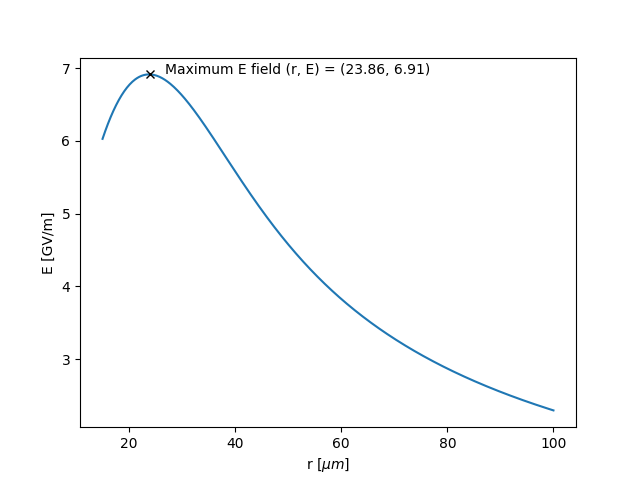

In [35]:
N = 1e10; sigma_z = 50e-6; sigma_r = 15e-6; r = np.linspace(15e-6, 1e-4, 500);
E = rad_EField(r, N, sigma_z, sigma_r)
amax = np.argmax(E);
Emax = E[amax]*1e-9; rmax = r[amax] * 1e6
plt.plot(r*1e6, E*1e-9)
plt.plot(rmax, Emax, 'kx')
plt.xlabel(r'r [$\mu m$]')
plt.ylabel('E [GV/m]')
xy = (rmax, Emax)
xy_pos = (rmax + 3, Emax)
plt.annotate('Maximum E field (r, E) = (%.2f, %.2f)' % xy, xy = xy_pos, textcoords='data', \
            )
plt.show()

In [82]:
def ADK_rate(t, E, ionE, Z, Vi, r, z):
    '''Computes the ionization rate from a beams uniform electric field using ADK.
       Assumes beam is cylindrically symettric;
    Parameters
    ----------
    E : function
        computes electric field (GV/cm) at postion r, z and time t
    ionE : float
        ionization energy of the gas, atomic units
    Z : int
        Charge of atomic residue (1 for first ionization, 2 for second, etc...)
    vi : float
        Quantum number l
    r : float
        radial position to compute E and W
    z : float
        value of z to compute E and W
    t : float
        time at which to compute E (first variable for integrating ADK_rate)
    Returns
    -------
    W_ADK : float
        ionization rate from ADK method, inverse seconds
    '''
    # constants 
    VH = 13.6; # eV
    wa = 4.13; # rad/s
    Ea = 5.1; # GV/cm
    n = Z / np.sqrt(Vi/13.6)
    W_ADK = Z**2 * wa / (4 * np.pi ** n**3) \ 
            * (2*Ea*Z**3 / (n**3 * E(r,z,t)))**(2*n-1) * (2*exp(1) / n)**(2*n) \
            * np.exp(-2*Ea*Z^3 / (3*n^3 * E(r,z,t))) 

In [85]:
def ionDensity(ng0, W, ionE, Z, Vi, r, z):
    '''Computes the ion density of a plasma produced via field ionization using ADK
    Parameters
    ----------
    ng0 : float
          the initial gas density at postion r, z
    W : function
        computes ionization rate at postion r, z and time t
    ionE : float
        ionization energy of the gas, atomic units
    Z : int
        Charge of atomic residue (1 for first ionization, 2 for second, etc...)
    vi : float
        Quantum number l
    r : float
        radial position to compute E and W
    z : float
        value of z to compute E and W
    t : float
        time at which to compute E (first variable for integrating ADK_rate)
    Returns
    -------
    nIons : float
        density of ions
    '''
    arg = (E, ionE, Z, Vi, r, z)
    return ng0 * (1 - np.exp(-scipy.integrate.quad(W, -np.inf, np.inf, args = arg)))
def N_Ions(ng0, W, ionE, Z, Vi, r, z):
    ''' Computes ion yield of an electron beam passing through a neutral gas using ADK
    Paramters
    ---------
    see ionDensity
    V : float
        Interaction volume
    '''
    return n(ng0, W, ionE, Z, Vi, r, z) * V;

5.374378533752977e-16